In [1]:
import pandas as pd

# Indroduction

This project aims at predicting diamond price based on its features using regression models

Diamonds data set available on kaggle (https://www.kaggle.com/enashed/diamond-prices)

# Project Planning
1. Data exploration
2. Data manipulation
3. Data cleaning
4. Feature engineering
5. Data preprocessing for model
6. Basic model building
7. Model Tuning
8. Ensemble model building
9. Results

# Data Exploration

In [2]:
df = pd.read_csv("./data/diamonds_project/diamonds.csv")

In [3]:
df.head()

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24


In [4]:
df.dtypes

diamond_id                       int64
shape                           object
size                           float64
color                           object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
clarity                         object
cut                             object
symmetry                        object
polish                          object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
culet_size                      object
culet_condition                 object
fluor_color                     object
fluor_intensity                 object
lab                             object
total_sales_price                int64
eye_clean                

In [5]:
df.shape

(219704, 27)

In [6]:
df.columns

Index(['diamond_id', 'shape', 'size', 'color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'clarity', 'cut', 'symmetry', 'polish',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'culet_size',
       'culet_condition', 'fluor_color', 'fluor_intensity', 'lab',
       'total_sales_price', 'eye_clean', 'date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [8]:
df.isnull().sum() / df.shape[0] * 100

diamond_id                      0.000000
shape                           0.000000
size                            0.000000
color                           4.170156
fancy_color_dominant_color     95.828933
fancy_color_secondary_color    99.516622
fancy_color_overtone           99.072388
fancy_color_intensity          95.829844
clarity                         0.000000
cut                            27.585752
symmetry                        0.000000
polish                          0.000000
depth_percent                   0.000000
table_percent                   0.000000
meas_length                     0.000000
meas_width                      0.000000
meas_depth                      0.000000
girdle_min                     37.975185
girdle_max                     38.367986
culet_size                     39.025689
culet_condition                93.027437
fluor_color                    92.842188
fluor_intensity                 0.058260
lab                             0.000000
total_sales_pric

In [9]:
nb_columns = ['size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

In [10]:
cat_columns = ['shape', 'color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_min', 'girdle_max', 'culet_size', 'fluor_intensity', 'lab']

In [11]:
df.describe()

,diamond_id,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,2.197040e+05,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,2.197040e+05
mean,1.281166e+08,0.755176,61.683794,57.747579,5.548867,5.135623,3.285698,6.908035e+03
std,1.320737e+07,0.845892,9.915251,9.959906,1.763932,1.374527,2.054817,2.595944e+04
min,9.666855e+06,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,1.275641e+08,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,1.326076e+08,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.348523e+08,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,1.361475e+08,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [12]:
df.color.unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', nan],
      dtype=object)

In [13]:
df['shape'].unique()

array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

<AxesSubplot:>

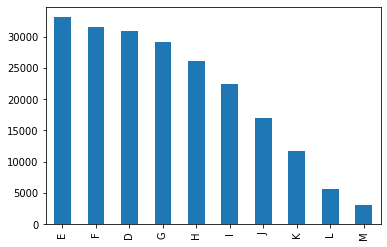

In [14]:
df['color'].value_counts().plot(kind='bar')

*color values are coded E been nearly colorless to M been Light Yellow color*

Refer to the link for more info https://australiandiamondimporters.com.au/colour/

<AxesSubplot:>

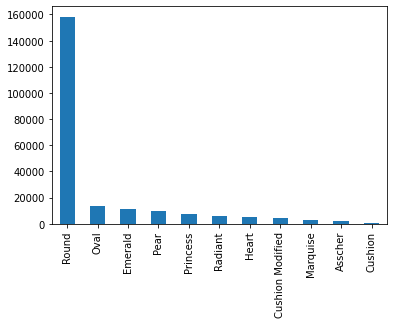

In [15]:
df['shape'].value_counts().plot(kind='bar')

<AxesSubplot:>

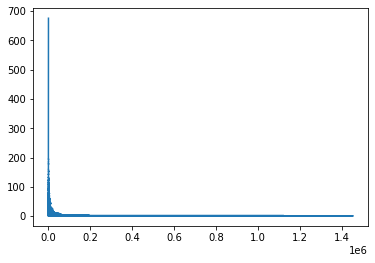

In [16]:
df['total_sales_price'].value_counts().plot()

In [22]:
df['date'].unique()

array(['2022-02-24'], dtype=object)

## Observations:

### Missing values
- fancy_color columns, culet_condition, fluor_color and eye_clean columns have more than 70% missing values so I will discard them for this analysis
- cut, girdle_min, girdle_max and culet_size has around 30% missing values, might need some data processing
- fluor_intensity, color have really small missing value that need to be handled

### Feature
- Round shape diamond are dominant
- most diamonds tends to be colorless color
- prices from 200 USD -> 1.4M USD (excluding taxes)
- date has only one value feb 2022 can be discarded

# Data Manipulation

In [23]:
df2 = df.drop(columns = ["fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "culet_condition", "fluor_color", "eye_clean", "date"])

In [24]:
df2.columns

Index(['diamond_id', 'shape', 'size', 'color', 'clarity', 'cut', 'symmetry',
       'polish', 'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'culet_size',
       'fluor_intensity', 'lab', 'total_sales_price'],
      dtype='object')

In [28]:
# cat_columns been 'shape', 'color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_min', 'girdle_max', 'culet_size', 'fluor_intensity', 'lab'
dummie_vars = pd.get_dummies(df2[cat_columns]).head(1000)

In [27]:
dummie_vars.head()

,shape_Asscher,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
